<a href="https://colab.research.google.com/github/aravind-3105/Pytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

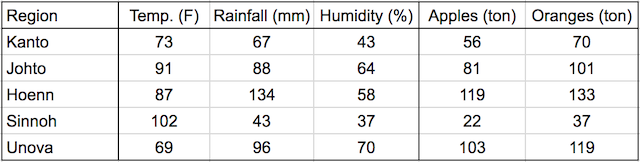

In [2]:
inputs = np.array([[73,67,43],
                  [91,88,64],
                  [87,134,58],
                  [102,43,37],
                  [69,96,70]],dtype='float32')
print("Input variables: Temp, Rainfall, Humidity: \n",inputs)

Input variables: Temp, Rainfall, Humidity: 
 [[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]


In [3]:
target = np.array([[56,70],
                  [81,101],
                  [119,133],
                  [22,37],
                  [103,119]],dtype='float32')
print("Independent Variables for prediction: Apples, Oranges \n",target)

Independent Variables for prediction: Apples, Oranges 
 [[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]


Convert numpy to tensors

In [4]:
inputs = torch.from_numpy(inputs)
target = torch.from_numpy(target)
print(inputs)
print(target)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Linear Regression from Scratch

In [5]:
weights = torch.randn(2,3,requires_grad=True)
bias = torch.randn(2,requires_grad=True)
print("Weights: \n",weights)
print("Bias \n",bias)

Weights: 
 tensor([[-1.2515,  0.0452,  2.0456],
        [ 0.5362,  0.0795,  0.0133]], requires_grad=True)
Bias 
 tensor([-0.3660, -0.8166], requires_grad=True)


In [6]:
def model(x):
  return x @ weights.t() + bias

In [7]:
Prediction = model(inputs)
print(Prediction)

tensor([[ -0.7404,  44.2272],
        [ 20.6378,  55.8288],
        [ 15.4473,  57.2607],
        [-50.3908,  57.7895],
        [ 60.8053,  44.7481]], grad_fn=<AddBackward0>)


In [8]:
print(target)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [9]:
#Find MSE
def MSE(target,pred): 
  diff = target - pred
  return torch.sum(diff * diff) / diff.numel()

In [10]:
error = MSE(target,Prediction)
print(error)

tensor(3899.3723, grad_fn=<DivBackward0>)


Find Gradients

In [11]:
#Compute Gradients
error.backward()

In [12]:
#Gradients for Weights
print(weights)
print(weights.grad)

tensor([[-1.2515,  0.0452,  2.0456],
        [ 0.5362,  0.0795,  0.0133]], requires_grad=True)
tensor([[-5787.8779, -6030.6074, -3588.2324],
        [-3116.8320, -4417.0283, -2564.0977]])


Update Weights


Torch.no_grad() deactivates autograd engine. Eventually it will reduce the memory usage and speed up computations.

Use of Torch.no_grad():

    To perform inference without Gradient Calculation.

    To make sure there's no leak test data into the model

In [13]:
with torch.no_grad():
    weights -= weights.grad * 1e-5
    bias -= bias.grad * 1e-5

In [14]:
# Let's verify that the loss is actually lower
Prediction = model(inputs)
error = MSE(target,Prediction)
print(error)

tensor(2819.5305, grad_fn=<DivBackward0>)


In [15]:
#Re-initialise to zero
weights.grad.zero_()
bias.grad.zero_()
print(weights.grad)
print(bias.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


**Train model using gradient descent**

In [16]:
Prediction = model(inputs)
print(Prediction)

tensor([[  9.0688,  50.5649],
        [ 33.5089,  64.1935],
        [ 30.6456,  67.3787],
        [-40.5657,  63.8172],
        [ 73.1008,  52.9343]], grad_fn=<AddBackward0>)


In [17]:
error = MSE(target, Prediction)
print(error)

tensor(2819.5305, grad_fn=<DivBackward0>)


In [18]:
# Compute gradients
error.backward()
print(weights.grad)
print(bias.grad)

tensor([[-4775.8506, -4944.7505, -2917.9814],
        [-2460.0771, -3704.7080, -2125.9443]])
tensor([-55.0483, -32.2223])


In [19]:
# Adjust weights & reset gradients
with torch.no_grad():
    weights -= weights.grad * 1e-5
    bias -= bias.grad * 1e-5
    weights.grad.zero_()
    bias.grad.zero_()

In [20]:
# Calculate loss
Prediction = model(inputs)
error = MSE(Prediction, target)
print(error)

tensor(2089.9832, grad_fn=<DivBackward0>)


In [21]:
print(weights)
print(bias)

tensor([[-1.1459,  0.1549,  2.1106],
        [ 0.5920,  0.1607,  0.0602]], requires_grad=True)
tensor([-0.3648, -0.8159], requires_grad=True)


In [22]:
#Training for epochs
for i in range(2000):
    Prediction = model(inputs)
    errpr = MSE(Prediction, target)
    errpr.backward()
    with torch.no_grad():
        weights -= weights.grad * 1e-5
        bias -= bias.grad * 1e-5
        weights.grad.zero_()
        bias.grad.zero_()

In [23]:
# Calculate loss
Prediction = model(inputs)
error = MSE(Prediction, target)
print(error)

tensor(4.3352, grad_fn=<DivBackward0>)


In [24]:
print(Prediction)
print(target)

tensor([[ 56.8899,  70.2654],
        [ 84.0390,  99.9726],
        [114.9676, 134.6125],
        [ 20.0429,  37.4898],
        [105.6412, 117.4861]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
